In [42]:
import pandas as pd
import numpy as np
df=pd.read_csv('LO-Shot Similarity Judgment Survey [Set 2] n=20.csv')
sims = df[1:].values[:,1:-1]

def v2m(v,size=16):
    simmat=np.eye(size)
    n=0
    for i in range(size):
        for j in range(i+1,size):
            simmat[i,j]=simmat[j,i]=v[n]/6
            n+=1
    return simmat
simmats=np.array([v2m(v) for v in sims])

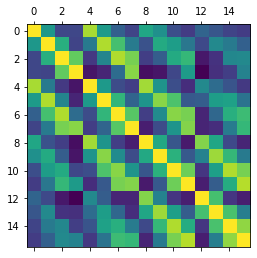

/home/is2961/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_mds.py:258: UserWarning: Explicit initial positions passed: performing only one init of the MDS instead of 4
  warnings.warn(


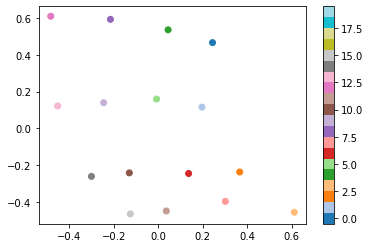

In [43]:
import matplotlib.pyplot as plt
plt.matshow(np.mean(simmats, axis=0))
plt.show()
from sklearn.manifold import MDS
def compute_MDS(similarity_matrix, n_components=2):
    dissimilarity = 1 - similarity_matrix/np.max(np.abs(similarity_matrix))
    embedding = MDS(n_components=n_components, metric=True, dissimilarity="precomputed", max_iter=10000, eps=1e-100)
    init = embedding.fit_transform(dissimilarity)
    embedding = MDS(n_components=n_components, metric=False, dissimilarity="precomputed", max_iter=10000, eps=1e-100)
    transformed = embedding.fit_transform(dissimilarity, init=init)
    return transformed

coords=compute_MDS(np.mean(simmats,axis=0))
plt.scatter(coords[:,0],coords[:,1], c=range(16), cmap='tab20', vmin=-0.5, vmax=19.5)
plt.colorbar()
plt.show()

In [30]:
df1d=pd.read_csv('lo-shot-similarity-judgments-1d.csv')
data_cols=list(df1d.columns)[19:-7]
sims=df1d[data_cols].iloc[2:].values.astype(np.int)
simmats=np.array([v2m(v,20) for v in sims])

/tmp/ipykernel_786921/2350459853.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sims=df1d[data_cols].iloc[2:].values.astype(np.int)


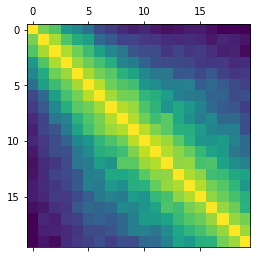

/home/is2961/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_mds.py:258: UserWarning: Explicit initial positions passed: performing only one init of the MDS instead of 4
  warnings.warn(


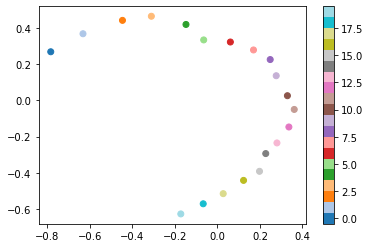

/home/is2961/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_mds.py:258: UserWarning: Explicit initial positions passed: performing only one init of the MDS instead of 4
  warnings.warn(


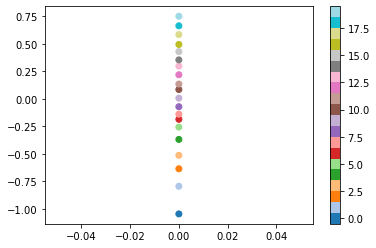

In [41]:
import matplotlib.pyplot as plt
plt.matshow(np.mean(simmats, axis=0))
plt.show()
from sklearn.manifold import MDS
def compute_MDS(similarity_matrix, n_components=2):
    dissimilarity = 1 - similarity_matrix/np.max(np.abs(similarity_matrix))
    embedding = MDS(n_components=n_components, metric=True, dissimilarity="precomputed", max_iter=10000, eps=1e-100)
    init = embedding.fit_transform(dissimilarity)
    embedding = MDS(n_components=n_components, metric=False, dissimilarity="precomputed", max_iter=10000, eps=1e-100)
    transformed = embedding.fit_transform(dissimilarity, init=init)
    return transformed

coords=compute_MDS(np.mean(simmats,axis=0))
plt.scatter(coords[:,0],coords[:,1], c=range(20), cmap='tab20', vmin=-0.5, vmax=19.5)
plt.colorbar()
plt.show()

coords1d=compute_MDS(np.mean(simmats,axis=0),1)
plt.scatter([0]*20,coords1d, c=range(20), cmap='tab20', vmin=-0.5, vmax=19.5)
# plt.plot([-0.5,20],[-0.5,1])
plt.colorbar()
plt.show()